Let's first import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 

## The Dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

#### Loading the dataset

In [2]:
data_raw = pd.read_csv('./data/ChurnData.csv')
data_raw.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


This tells us that the data is composed of 28 columns, most of which we will not be using, so now we'll create a new dataset with only the atributes we are gonna be using

In [40]:
data = data_raw[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


Our results (churn) cannot be a float, so we have to transform it into int

In [41]:
data['churn'] = data['churn'].astype('int')
data.head()

<ipython-input-41-68e685133f4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['churn'] = data['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


Now we have to define the X and Y of our data, X being the parameters and Y being the answer

In [42]:
x = np.asarray(data[['tenure', 'age', 'address', 'income', 'ed', 'equip', 'callcard', 'wireless']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,   0.,   1.,   0.]])

In [44]:
y = np.asarray(data['churn'])
y[0:4]

array([1, 1, 0, 0])

And now, as usual, for better results, we normalize the dataset

In [45]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
         1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
        -0.85972695,  0.64686916, -0.63910148]])

## Train / Test dataset

In [46]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 4)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (160, 8) (160,)
Test set:  (40, 8) (40,)


## Logistic Regression

### Modeling

In [47]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)
logReg

LogisticRegression(C=0.01, solver='liblinear')

### Prediction
Now we can predict using our test set:


In [48]:
predict = logReg.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

### Evaluation
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

#### Jaccard Score

In [50]:
from sklearn.metrics import jaccard_score as jaccard
jaccard(y_test, predict, pos_label = 0)

0.5588235294117647

It gives us a result of 55.88%, which is not so good, be Jaccard Score is not a good metric so we can plot a graph to analyze our train and test sets

#### Confusion Matrix

In [63]:
# Requirements
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Create the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ## End of Function ##
    
# Test the function
print(confusion_matrix(y_test, predict, labels = [1,0]))

[[ 6  9]
 [ 6 19]]


Now we can compute our graph

Confusion matrix, without normalization
[[ 6  9]
 [ 6 19]]


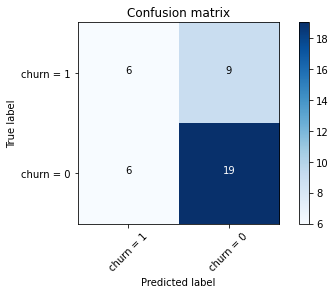

In [64]:
compute_matrix = confusion_matrix(y_test, predict, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot compute_matrix
plt.figure()
plot_confusion_matrix(compute_matrix, classes=['churn = 1', 'churn = 0'], normalize = False, title = 'Confusion matrix')